In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("h1b_kaggle.csv")

In [3]:
data.shape

(3002458, 11)

In [4]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [7]:
data.shape

(2877765, 11)

In [8]:
data.CASE_STATUS.value_counts()

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 0 to 3002444
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 263.5+ MB


,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,2.877765e+06,2.877765e+06,2.877765e+06,2.877765e+06,2.877765e+06
mean,1.489381e+06,1.451666e+05,2.013877e+03,-9.212937e+01,3.815896e+01
std,8.659624e+05,5.307856e+06,1.675226e+00,1.965994e+01,4.674872e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.404220e+05,5.460000e+04,2.012000e+03,-1.118999e+02,3.416536e+01
50%,1.484061e+06,6.512500e+04,2.014000e+03,-8.615807e+01,3.910312e+01
75%,2.236965e+06,8.151500e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002445e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [10]:
import warnings
warnings.filterwarnings("ignore")
data.CASE_STATUS[data['CASE_STATUS']=='REJECTED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'
data = data.drop(data[data.CASE_STATUS == 'WITHDRAWN'].index)

In [11]:
data.CASE_STATUS.value_counts()

CERTIFIED    2707835
DENIED         85178
Name: CASE_STATUS, dtype: int64

In [12]:
data = data.drop('lat', axis = 1)
data = data.drop('lon', axis = 1)

In [13]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,3,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,4,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,6,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA"


In [14]:
data['NEW_EMPLOYER'] = np.nan
data.shape

(2793013, 10)

In [15]:
data['EMPLOYER_NAME'] = data['EMPLOYER_NAME'].str.lower()
data.NEW_EMPLOYER[data['EMPLOYER_NAME'].str.contains('university')] = 'university'
data['NEW_EMPLOYER']= data.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

In [16]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER
0,1,CERTIFIED,university of michigan,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university
1,2,CERTIFIED,"goodman networks, inc.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",non university
2,3,CERTIFIED,"ports america group, inc.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",non university
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",non university
5,6,CERTIFIED,burger king corporation,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",non university


In [17]:
## Splitting city and state and capturing state in another variable
data['state'] = data.WORKSITE.str.split(',').str[-1]

In [18]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER,state
0,1,CERTIFIED,university of michigan,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",non university,TEXAS
2,3,CERTIFIED,"ports america group, inc.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",non university,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",non university,COLORADO
5,6,CERTIFIED,burger king corporation,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",non university,FLORIDA


In [19]:
data = data.drop('EMPLOYER_NAME', axis = 1)
data = data.drop('WORKSITE', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)

In [20]:
data.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
0,CERTIFIED,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,university,MICHIGAN
1,CERTIFIED,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,non university,TEXAS
2,CERTIFIED,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,non university,NEW JERSEY
3,CERTIFIED,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,non university,COLORADO
5,CERTIFIED,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,non university,FLORIDA


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[['CASE_STATUS','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','NEW_EMPLOYER','state']] = data[['CASE_STATUS','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','NEW_EMPLOYER','state']].apply(le.fit_transform)

In [22]:
data.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
0,0,160,153988,0,36067.0,2016.0,1,22
1,0,242,40901,1,242674.0,2016.0,0,45
2,0,242,40967,1,193066.0,2016.0,0,31
3,0,242,176465,1,220314.0,2016.0,0,5
5,0,242,83327,1,225000.0,2016.0,0,9


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2793013 entries, 0 to 3002392
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         int32  
 1   SOC_NAME            int32  
 2   JOB_TITLE           int32  
 3   FULL_TIME_POSITION  int32  
 4   PREVAILING_WAGE     float64
 5   YEAR                float64
 6   NEW_EMPLOYER        int32  
 7   state               int32  
dtypes: float64(2), int32(6)
memory usage: 127.9 MB


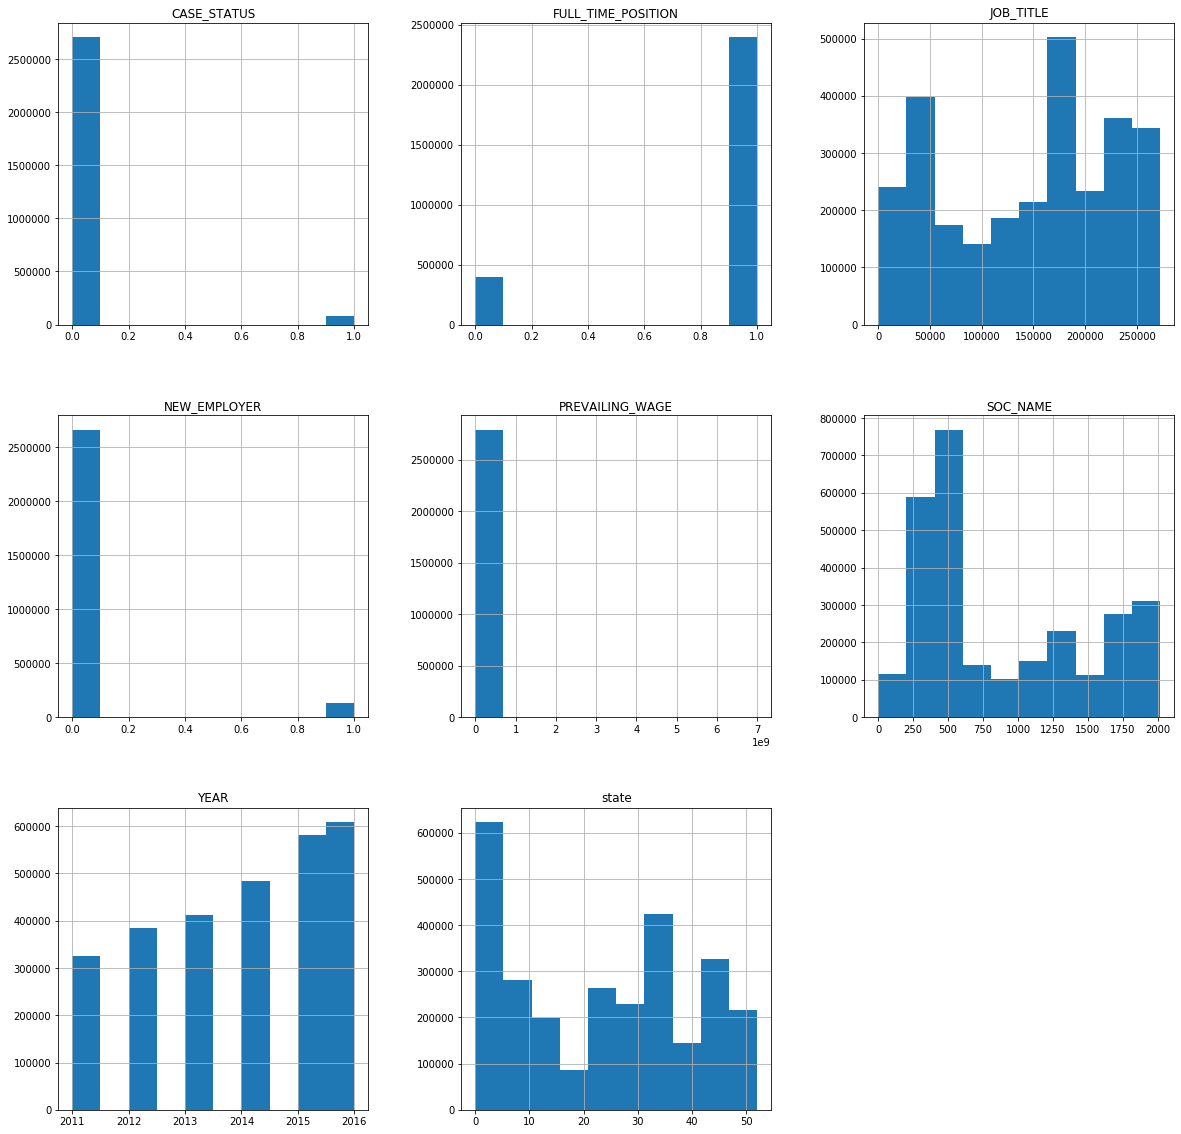

In [24]:
data.hist(figsize=(20,20))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x = data.drop('CASE_STATUS', axis=1)
y = data.CASE_STATUS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [26]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_test, pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    541610
           1       0.97      0.02      0.03     16993

    accuracy                           0.97    558603
   macro avg       0.97      0.51      0.51    558603
weighted avg       0.97      0.97      0.96    558603



Confusion Matrix:
[[541601      9]
 [ 16715    278]]


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9700610272411713


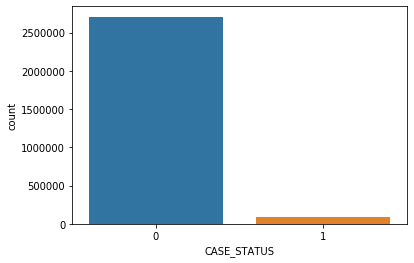

In [29]:
sns.countplot(x=data['CASE_STATUS'], data=data)
plt.show()

In [25]:
#undersampling the dataset to balance the case_status
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res, y_res = nm.fit_resample(x, y)

In [26]:
x_res.shape

(170356, 7)

In [27]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size=0.2, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(Y_test,Y_Test_Pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_Test_Pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     16942
           1       0.69      0.67      0.68     17130

    accuracy                           0.68     34072
   macro avg       0.68      0.68      0.68     34072
weighted avg       0.68      0.68      0.68     34072



Confusion Matrix:
[[11783  5159]
 [ 5608 11522]]


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_Test_Pred))

0.6839927212960789


In [66]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
k_pred = knn.predict(X_test)

In [67]:
print('Classification Report:')
print(classification_report(Y_test,pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test, k_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16942
           1       0.99      0.95      0.97     17130

    accuracy                           0.97     34072
   macro avg       0.97      0.97      0.97     34072
weighted avg       0.97      0.97      0.97     34072



Confusion Matrix:
[[16758   184]
 [  776 16354]]


In [68]:
print(accuracy_score(Y_test, k_pred))

0.9718243719182906


In [40]:
#choosing the right K value 
error_rate = [] 
for i in range(1, 20): 
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != Y_test)) 

Text(0, 0.5, 'Error Rate')

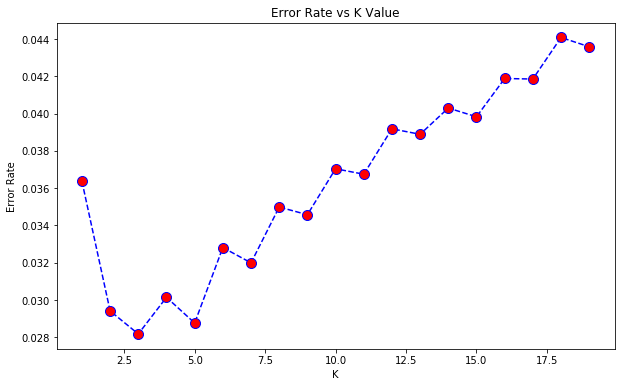

In [41]:
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 20), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, Y_train)
d_pred = dtc.predict(X_test)

In [39]:
print('Classification Report:')
print(classification_report(Y_test,d_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,d_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16942
           1       0.99      0.96      0.97     17130

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072



Confusion Matrix:
[[16835   107]
 [  740 16390]]


In [40]:
print(accuracy_score(Y_test,d_pred))

0.9751408781404085


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=11)
rf.fit(X_train,Y_train)
r_pred=rf.predict(X_test)

In [42]:
print('Classification Report:')
print(classification_report(Y_test,r_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,r_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16942
           1       0.99      0.96      0.98     17130

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072



Confusion Matrix:
[[16820   122]
 [  646 16484]]


In [84]:
print(accuracy_score(Y_test,r_pred))

0.9774594975346326


In [57]:
rf1=RandomForestClassifier()
param_grid = { 
    'n_estimators': [9,10,11,12,13],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [58]:
from sklearn.model_selection import GridSearchCV
CV_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv= 5)
CV_rf1.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [9, 10, 11, 12, 13]})

In [59]:
CV_rf1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 12}

In [66]:
rf2=RandomForestClassifier(n_estimators=12,max_features='sqrt',criterion='gini',max_depth= 8)
rf2.fit(X_train,Y_train)
r1_pred=rf2.predict(X_test)

In [67]:
print('Classification Report:')
print(classification_report(Y_test,r1_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,r1_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     16942
           1       0.95      0.91      0.93     17130

    accuracy                           0.93     34072
   macro avg       0.93      0.93      0.93     34072
weighted avg       0.93      0.93      0.93     34072



Confusion Matrix:
[[16129   813]
 [ 1622 15508]]


In [68]:
print(accuracy_score(Y_test,r1_pred))

0.9285336933552477


In [44]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
n_pred=nb.predict(X_test)

In [45]:
print('Classification Report:')
print(classification_report(Y_test,n_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(Y_test,n_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.68     16942
           1       0.92      0.06      0.12     17130

    accuracy                           0.53     34072
   macro avg       0.72      0.53      0.40     34072
weighted avg       0.72      0.53      0.40     34072



Confusion Matrix:
[[16848    94]
 [16052  1078]]


In [47]:
print(accuracy_score(Y_test,n_pred))

0.5261211552007513


In [92]:
print("Accuracy scores of each model")
print("LogisticRegression: ",accuracy_score(Y_test, Y_Test_Pred))
print("Knn               : ",accuracy_score(Y_test, k_pred))
print("Decision tree     : ",accuracy_score(Y_test,d_pred))
print("Random forest     : ",accuracy_score(Y_test,r_pred))
print("GaussianNB        : ",accuracy_score(Y_test,n_pred))
print()
print("Highest accuracy is for Random Forest")

Accuracy scores of each model
LogisticRegression:  0.6839927212960789
Knn               :  0.9718243719182906
Decision tree     :  0.9751408781404085
Random forest     :  0.9774594975346326
GaussianNB        :  0.5261211552007513

Highest accuracy is for Random Forest


In [55]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [59]:
#mcnemar's statistical test b/w random forest and decision tree for 4 iterations
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar
rfc_score=[]
dt_score=[]
for i in [9,15,42,98] :
    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_res,y_res, test_size=0.2, random_state=i)
    rf.fit(X_train1,Y_train1)
    r_avg=rf.predict(X_test1)
    r_pred_avg=accuracy_score(Y_test1,r_avg)
    rfc_score.append(r_pred_avg)
    dtc.fit(X_train1, Y_train1)
    d_avg = dtc.predict(X_test1)
    d_pred_avg=accuracy_score(Y_test1,d_avg)
    dt_score.append(d_pred_avg)
    tb = mcnemar_table(y_target=Y_test, 
                   y_model1=r_avg, 
                   y_model2=d_avg)

    print(tb)
    chi2, p = mcnemar(ary=tb, exact=True)
    print('chi-squared:', chi2)
    print('p-value:', p)
    print()

[[16988   105]
 [   95 16884]]
chi-squared: 95
p-value: 0.5246223557223909

[[16932   103]
 [   98 16939]]
chi-squared: 98
p-value: 0.7779207003754158

[[33172    58]
 [  119   723]]
chi-squared: 58
p-value: 5.294914244749848e-06

[[16989    73]
 [   84 16926]]
chi-squared: 73
p-value: 0.42491156013385617



In [64]:
#this is the accuracy of random forest and decision tree on 4 iterations
print("random forest: ",rfc_score)
print("decition tree: ",dt_score)

random forest:  [0.9782225874618455, 0.9782812866870157, 0.977077952571026, 0.9787802301009627]
decition tree:  [0.9765790091570792, 0.9754930734914299, 0.9752876262033341, 0.9769312045081004]


In [61]:
#this is the mean accuracy of random forest and decision tree
print("mean accuracy of random forest is: ",np.mean(rfc_score))
print("mean accuracy of decision tree is: ",np.mean(dt_score))

mean accuracy of random forest is:  0.9780905142052125
mean accuracy of decision tree is:  0.9760727283399859
